In [5]:
import numpy as np
from scipy.optimize import minimize

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  

In [6]:
m = [2, 1]
S = [[3, 1],
     [1, 2]]
a = [1, 1]


In [7]:
def exp(a):
    return np.dot(a, m) 

def var(a):
    e_r = np.dot(a, m) 
    E_xx = S + np.outer(m, m)
    var_r = np.trace(np.dot(np.outer(a, a), E_xx)) - e_r ** 2
    return(var_r)

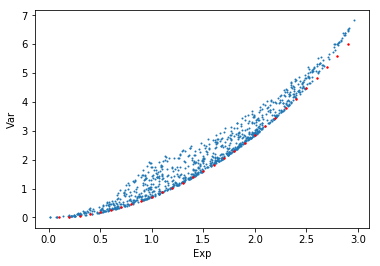

In [8]:

e = np.zeros(1000)
v = np.zeros(1000)
for i in range(1000):
    a = np.random.uniform(size=2)
    e[i] = exp(a)
    v[i] = var(a)
    
plt.xlabel("Exp")
plt.ylabel("Var")
plt.scatter(e, v, s=1)

for e_min in np.arange(0.1, 3.0, 0.1):
    x0 = np.ones(2)

    cons = ({'type': 'ineq', 'fun': lambda x:  exp(x) - e_min})
    result = minimize(var, x0, bounds = ((0.0, None), (0.0, None)), constraints=cons)
    a = result.x
    
    e = exp(a)
    v = var(a)
    
    plt.scatter(e, v, s=2, c='r')

randn('state',0);
n = 30;                                             % number of stocks
B = 5;                                              % budget
Beta = 0.1;                                         % fixed cost
Alpha = 0.05*rand(n,1);                             % linear cost
mu = linspace(0.03,0.3,30)';                        % mean return
stddev = linspace(0,0.4,30);
t = randn(n);
s = t*t';
Sigma = diag(diag(s))^(-.5)*s*s'*diag(diag(s))^(-.5);
Sigma = diag(stddev)*Sigma*diag(stddev);            % covariance of return
Rmin = 0.4;                                         % minimum return

In [14]:
B = 5                                              # budget
Beta = 0.1                                         # fixed cost
Rmin = 0.4 

In [15]:
mu =[0.030000, 0.039310, 0.048621, 0.057931, 0.067241, 0.076552, 0.085862, 0.095172, 0.104483, 0.113793, 
     0.123103, 0.132414, 0.141724, 0.151034, 0.160345, 0.169655, 0.178966, 0.188276, 0.197586, 0.206897, 
     0.216207, 0.225517, 0.234828, 0.244138, 0.253448, 0.262759, 0.272069, 0.281379, 0.290690, 0.300000]

In [20]:
import pandas as pd
df=pd.read_csv('Sigma.txt', sep=' ',header=None)
Sigma = df.values

m = mu
S = Sigma

In [21]:
def exp(a):
    return np.dot(a, m) 

def var(a):
    e_r = np.dot(a, m) 
    E_xx = S + np.outer(m, m)
    var_r = np.trace(np.dot(np.outer(a, a), E_xx)) - e_r ** 2
    return(var_r)

In [56]:
gammas = np.array(range(21))

var_arr = np.zeros(21)
card_arr = np.zeros(21)

for i, Gamma in enumerate(gammas):
    cons = ({'type': 'ineq', 'fun': lambda x:  exp(x) - Rmin},
        {'type': 'ineq', 'fun': lambda x:  B - (1 + Beta * Gamma) * sum(x)} )

    x0 = np.ones(30)

    result = minimize(var, x0, bounds = [(0.0, None)] * 30, constraints=cons)
    x = result.x

    mask = x > 1e-3

    c = np.zeros(30)
    c[mask] = 1.0

    card = sum(mask)

    cons = ({'type': 'ineq', 'fun': lambda x:  exp(x) - Rmin},
            {'type': 'ineq', 'fun': lambda x:  B - (1 + Beta * card) * sum(x)} )

    x0 = x

    def mod_var(a):
        return var(a*c)

    result = minimize(mod_var, x0, bounds = [(0.0, None)] * 30, constraints=cons)
    x = result.x * c
    
    var_arr[i] = result.fun
    card_arr[i] = card
    print(result.fun, card)

1.40541568503e-07 18
4.18794661554e-07 18
1.08369874676e-06 18
5.98085148387e-07 18
2.13711613532e-07 17
4.24555160481e-08 16
2.29066235201e-07 16
5.26292169855e-07 16
2.01340915086e-07 17
7.0337692324e-07 17
6.86005353783e-07 17
6.30653812653e-08 16
2.83283347375e-07 15
2.25423247832e-07 15
4.83148159002e-07 15
1.75627734451e-07 13
3.07120478197e-08 13
1.86514710543e-07 14
1.01221747765e-07 14
1.45791286317e-07 14
4.68686659874e-07 11


(3.0712047819729529e-10, 1.1920686214305309e-06)

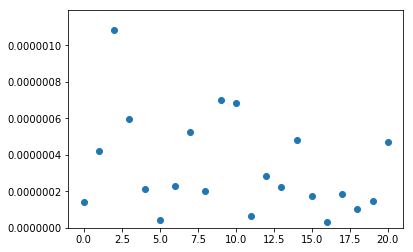

In [70]:
plt.scatter(gammas, var_arr)
plt.ylim((min(var_arr) * 0.01, max(var_arr) * 1.1))

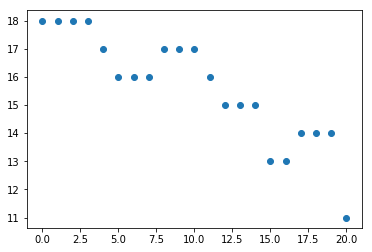

In [64]:
plt.scatter(gammas, card_arr)